In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np


# Load data
file_path = r'C:\Users\eoin0\OneDrive - National College of Ireland\NCI\Eoin-NCI\Semester 5\Machine Learning\Project\bmw.csv'
df = pd.read_csv(file_path)

# Convert categorical features to numeric using pd.get_dummies
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('price', axis=1)  # features
y = df['price']  # target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (Linear Regression requires scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)

# Calculate RMSE and R²
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 4257.787842417903
R²: 0.8598093284080306


C:\Users\eoin0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error (RMSE): The RMSE value was found to be 4257.79, meaning that the model's predictions on car prices had an average deviation of about 4257 currency units. This indicates a reasonable degree of accuracy in predicting the car prices, with a potential error margin of this size.

R² (Coefficient of Determination): The R² value of 0.860 suggests that the model explains approximately 86% of the variation in car prices. This indicates that the model captures the main factors that influence car price well, but there may still be unexplained variance, possibly due to factors not included in the model.

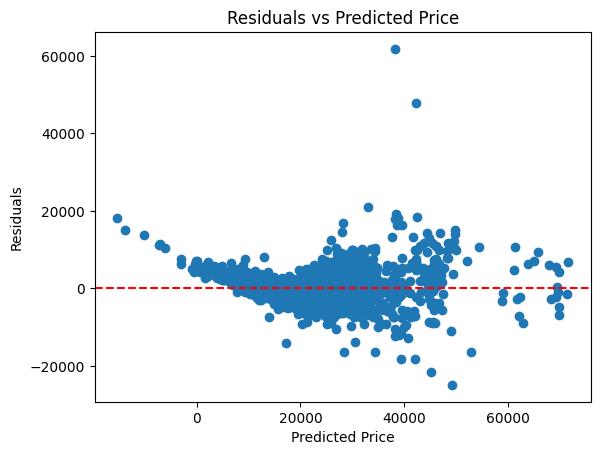

In [6]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()


In [7]:
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print(feature_importance)


year                      4154.122291
model_ X5                 3322.186137
model_ i3                 2960.739139
model_ X7                 2829.910101
model_ 8 Series           2025.097786
engineSize                1972.648730
model_ X6                 1880.162132
model_ X3                 1774.829571
model_ M4                 1641.467419
model_ i8                 1549.274041
fuelType_Hybrid           1521.621613
model_ M5                 1463.237697
model_ 5 Series           1376.737192
model_ 7 Series           1268.430468
model_ X4                 1199.661052
model_ 3 Series           1112.948622
model_ M3                  797.897341
model_ 4 Series            775.415666
model_ X1                  623.157882
model_ X2                  610.123436
model_ Z3                  593.634918
model_ Z4                  564.640310
model_ M2                  530.590361
model_ 6 Series            520.060323
transmission_Semi-Auto     456.986955
fuelType_Other             433.626647
model_ M6   

In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {scores}")
print(f"Average R² Score: {np.mean(scores)}")


Cross-Validation R² Scores: [0.87147025 0.87045373 0.87940775 0.87222607 0.84375786]
Average R² Score: 0.8674631312298114
